# Generation of labeled time-series

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%run plot.py

## Function for the random step
$DX$ is the standard deviation, $bias$ is the constant average of the step

In [ ]:
# random seed for reproducibility
np.random.seed(12345)

# function for the random step, using lambda construction
# int() for cleaner look and for mimiking a detector with finite resolution
jump = lambda drift, stdev: int(np.random.normal(drift,stdev))
#steps of the time series
for i in range(10):
    print(jump(5,50))

-5
28
-20
-22
103
74
9
19
43
67


## Function for the added pattern
Sinusoidal pattern to add to part of a time series, over $z$ bins, with amplitude $a$. The period of the sine function is $z/2$, such that for the considered bins the sine has always the same concavity.

In [ ]:
def pattern(i,z,a):
    return int(a*np.sin((np.pi*i)/z))

## Generation of the data

### Data ($x$)
The shape of $x$ is ($N$, $L$). Each line corresponds to one sample of the time series, of length L. 

Every time series starts from the previous one plus a jump:
$$
x[i][0] = x[i-1][-1] + \text{jump}(bias,DX)\quad ,\quad \; i>0
$$
The same is true for the elements of each time series:
$$
x[i][j] = x[i][j-1] + jump(bias,DX)\quad ,\quad \; j>0
$$

In this case, we decided to use:
In our case
- $N=10.000$
- $L=60$
- $bias=5$
- $DX=50$.

### Labels ($y$)
The labels are of 3 types: $0, 1, 2$. For each time series, we select at random $Z$ consecutive samples, with $Z\leq L$. In our case $Z=12$, so only one fifth of the original series if modified by the additional pattern. If $y=1$ we add to the selected portion a concave pattern, if $y=2$ a convex one and, finally, if $y=0$ the series is not modified. 

The labels can be created in 2 ways:
1. Taking the module of $i$ divided by $3$  
2. Selecting a random integer in the range $[0, 2]$


First 3 time series: 

[  0.  -5.  23.   3. -19.  84. 158. 167. 186. 229. 296. 351. 292. 310.
 326. 398. 447. 352. 339. 427. 411. 390. 418. 585. 539. 516. 527. 547.
 578. 583. 655. 625. 589. 476. 388. 350. 383. 325. 335. 287. 308. 196.
 192. 120.  77.  17.  36.  59.  27.  48. 120. 128. 145. 149. 204. 275.
 235. 163. 169. 211.] 0.0
[183. 231. 235. 242. 280. 327. 285. 288. 307. 400. 449. 468. 575. 634.
 655. 661. 561. 431. 270. 110. 126. 133.  81. 126. 152. 207. 303. 259.
 306. 305. 355. 369. 482. 482. 587. 593. 637. 647. 615. 649. 661. 588.
 565. 568. 527. 508. 511. 570. 624. 600. 684. 663. 690. 741. 668. 622.
 607. 623. 619. 657.] 1.0
[580. 623. 678. 663. 597. 579. 558. 521. 610. 643. 496. 417. 360. 369.
 247. 190. 258. 256. 359. 489. 648. 783. 751. 706. 825. 746. 794. 774.
 749. 796. 798. 793. 831. 835. 777. 810. 841. 801. 790. 777. 894. 865.
 828. 836. 837. 826. 839. 855. 854. 851. 785. 799. 883. 811. 830. 807.
 807. 804. 789. 732.] 2.0


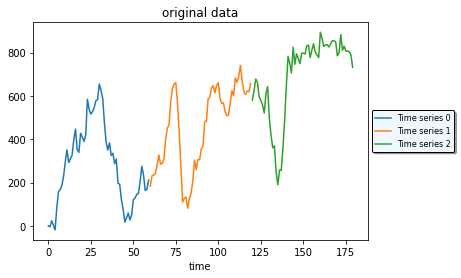

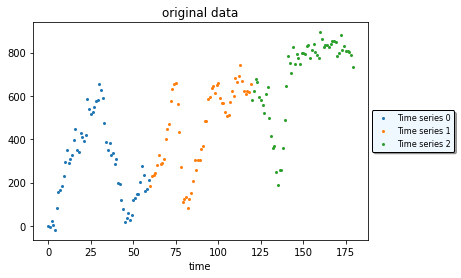

In [ ]:
# random seed for reproducibility
np.random.seed(12345)

# pattern parameters: Z=nr of steps, A=amplitude
Z=12
A=500

# number of data samples
N=10000
# size of each sample of the timeseries
L=60

# jump parameters: introduce small positive bias 
DX = 50  # std
bias = 5 # average step

# initialize x and y
# y = [0] * N 
# x = [[0] * L for i in range(N)]
y = np.zeros(N)
x = np.zeros((N, L))
for i in range(N):
    if i>0:
        x[i][0] = x[i-1][-1] + jump(bias,DX)#Every time series starts from 
                                            #the previous + a jump 
    
    for j in range(1,L):
        x[i][j] = x[i][j-1] + jump(bias,DX)
        
    y[i] = i%3 #for the labels
    ##y[i] = random.randint(0,2)
    if y[i]>0:
        j0 = np.random.randint(0,L-1-Z)
        ###print(i,j0,j1)
        sign = 3-2*y[i]
        for j in range(Z):
            x[i][j0+j] += sign*pattern(j,Z,A)

print('First 3 time series: \n')        
for i in range(min(3,N)):
    print(x[i],y[i])
    

Show_data(x,L,"original data")
Show_data_scatter(x,L,"original data")


## Save data on file

In [ ]:
# command in linux
!mkdir DATA
str0 = f'ts_L{L}_Z{Z}_A{A}_DX{DX}_bias{bias}_N{N}.dat'
print(str0)

fname='DATA/x_'+str0
np.savetxt(fname,x,fmt="%d")
fname='DATA/y_'+str0
np.savetxt(fname,y,fmt="%d")

mkdir: cannot create directory ‘DATA’: File exists
ts_L60_Z12_A500_DX50_bias5_N10000.dat


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3c8e8699-579b-4f24-9413-a98afebf04a2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>